In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

First goal: regression line for 3PM and 3PA over the years using team statistics
These totals will also be including the stats of players who played under 20 minutes, while the player statistics file does not

In [ ]:
team = pd.read_csv("all_team_stats_1996-2025.csv")
team["YEAR"] = team["SEASON"].str[0:4].astype(int) # extract first season from [XXXX-XX] and make a year column for the first year of "XXXX-XX"
totals = team.groupby("YEAR")[["FG3A", "FG3M"]].mean().round(2).reset_index() # total fg3a and fg3m for each year

y0_slope, y0_int, y0_r, y0_p, y0_se = linregress(totals["YEAR"], totals["FG3A"])
y1_slope, y1_int, y1_r, y1_p, y2_se = linregress(totals["YEAR"], totals["FG3M"])

In [4]:
# intercept does not really matter for analysis since we will never be looking at year 0, but it matters for the model
print("---3-point attempts vs Year Summary---")
print(f"Slope: {y0_slope: .3f}")
print(f"Intercept: {y0_slope: .3f}")
print(f"R-squared: {y0_r**2: .3f}")
print(f"P-value: {y0_p: .15f}") # very small value

print("---3-point makes Vs Year Summary---")
print(f"Slope: {y1_slope: .3f}")
print(f"Intercept: {y1_slope: .3f}")
print(f"R-squared: {y1_r**2: .3f}")
print(f"P-value: {y1_p: .15f}") # very small value

---3-point attempts vs Year Summary---
Slope:  0.904
Intercept:  0.904
R-squared:  0.880
P-value:  0.000000000000060
---3-point makes Vs Year Summary---
Slope:  0.331
Intercept:  0.331
R-squared:  0.879
P-value:  0.000000000000066


Judging the entire league's stats for a single season:
For each year that passes, the expected value for 3-point attempts increases by 27.717
For each year that passes, the expected value for 3-point makes increases by 10.124 
The r^2 is high and the p-value is low for both the 3PM and 3PA statistics
We would reject the null hypothesis that the year is not a significant predictor for both 3PM and 3PA, even when using a very small alpha like .001
Year is a great estimator for both 3PM and 3PA

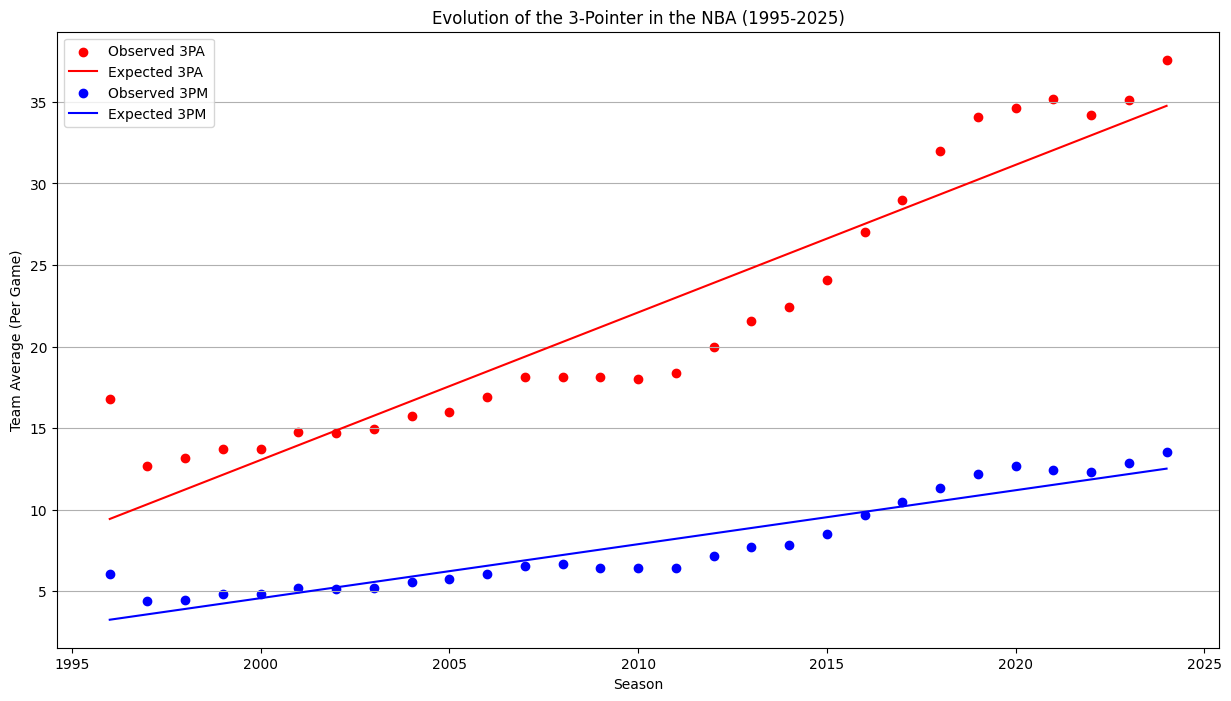

In [ ]:
X = totals["YEAR"]
y0 = totals["FG3A"]
y1 = totals["FG3M"]
plt.figure(figsize=(15, 8))
plt.scatter(X, y0,
            label = "Observed 3PA",
            color = "red")
plt.plot(X, y0_int + y0_slope*X,
         label = "Expected 3PA",
         color = "red")
plt.scatter(X, y1,
            label = "Observed 3PM",
            color = "blue")
plt.plot(X, y1_int + y1_slope*X,
         label = "Expected 3PM",
         color = "blue")

plt.title("Evolution of the 3-Pointer in the NBA (1996-2025)")
plt.xlabel("Season")
plt.ylabel("Team Average (Per Game)")
plt.legend()
plt.grid(axis = "y", linestyle = "-")
plt.savefig("nba_3pt_regression_plot.png")

Comparing FG% and 3PT% over the years

In [8]:
total_percents = team.groupby("YEAR")[["FG_PCT", "FG3_PCT"]].mean().reset_index()

y0_slope, y0_int, y0_r, y0_p, y0_se = linregress(total_percents["YEAR"], total_percents["FG_PCT"])
y1_slope, y1_int, y1_r, y1_p, y2_se = linregress(total_percents["YEAR"], total_percents["FG3_PCT"])

In [9]:
print("---FG Percent vs Year Summary---")
print(f"Slope: {y0_slope: .8f}")
print(f"R-squared: {y0_r**2: .3f}")
print(f"P-value: {y0_p: .6f}") # small enough to confidently reject H0 that there is no correlation

print("---3PT Percent Vs Year Summary---")
print(f"Slope: {y1_slope: .8f}")
print(f"R-squared: {y1_r**2: .3f}")
print(f"P-value: {y1_p: .6f}") # small enough to confidently reject H0 that there is no correlation

---FG Percent vs Year Summary---
Slope:  0.00084599
R-squared:  0.584
P-value:  0.000001
---3PT Percent Vs Year Summary---
Slope:  0.00044823
R-squared:  0.314
P-value:  0.001586


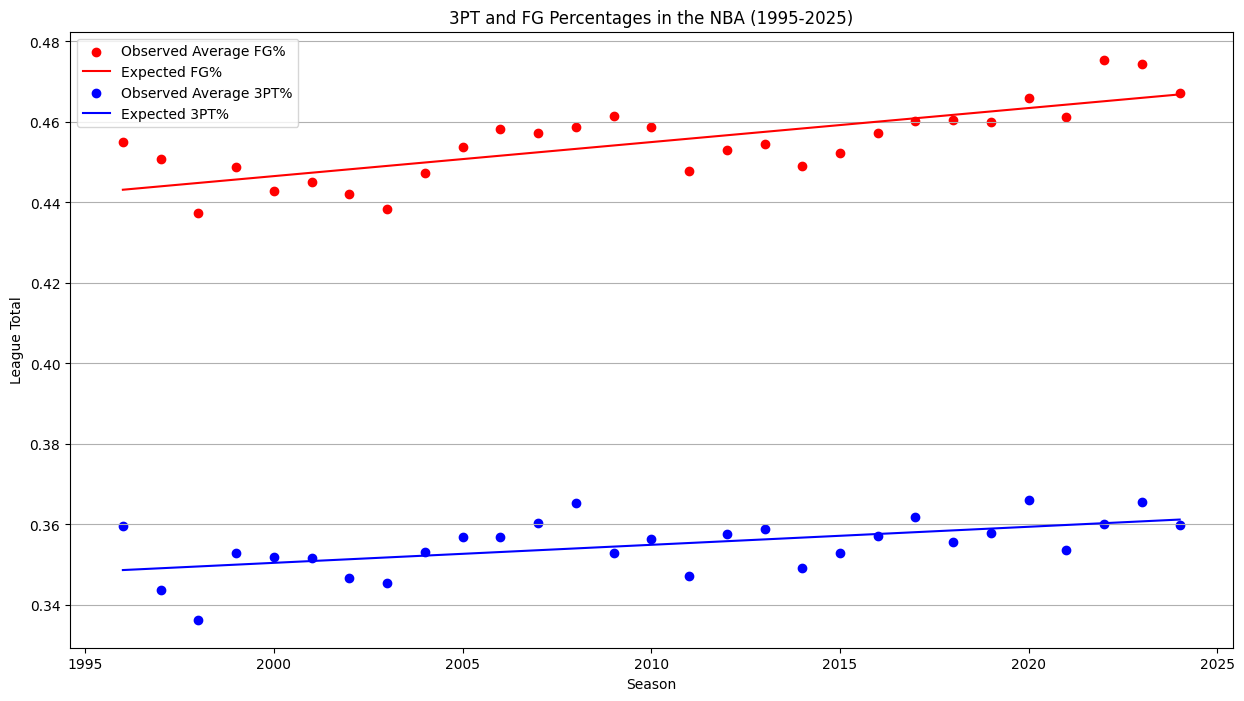

In [ ]:
X = totals["YEAR"]
y0 = total_percents["FG_PCT"]
y1 = total_percents["FG3_PCT"]
plt.figure(figsize=(15, 8))
plt.scatter(X, y0,
            label = "Observed Average FG%",
            color = "red")
plt.plot(X, y0_int + y0_slope*X,
         label = "Expected FG%",
         color = "red")
plt.scatter(X, y1,
            label = "Observed Average 3PT%",
            color = "blue")
plt.plot(X, y1_int + y1_slope*X,
         label = "Expected 3PT%",
         color = "blue")

plt.title("3PT and FG Percentages in the NBA (1996-2025)")
plt.xlabel("Season")
plt.ylabel("League Total")
plt.legend()
plt.grid(axis = "y", linestyle = "-")
plt.savefig("nba_fg_percentages.png")

Plot above shows that the expected FG% and 3PT% grows with each passing year.
The line for expected FG% grows at a faster rate than the line for expected 3PT%, and that metric has actually shown the most growth in recent years, compared to previous years.

In [ ]:
player = pd.read_csv("all_player_stats_1996-2025.csv")
player["YEAR"] = player["SEASON"].str[0:4].astype(int)
positional_3pa = player.groupby("YEAR")[["FG3A", "FG3M"]].sum().reset_index()

Looking at positional 3-point attempt statistics

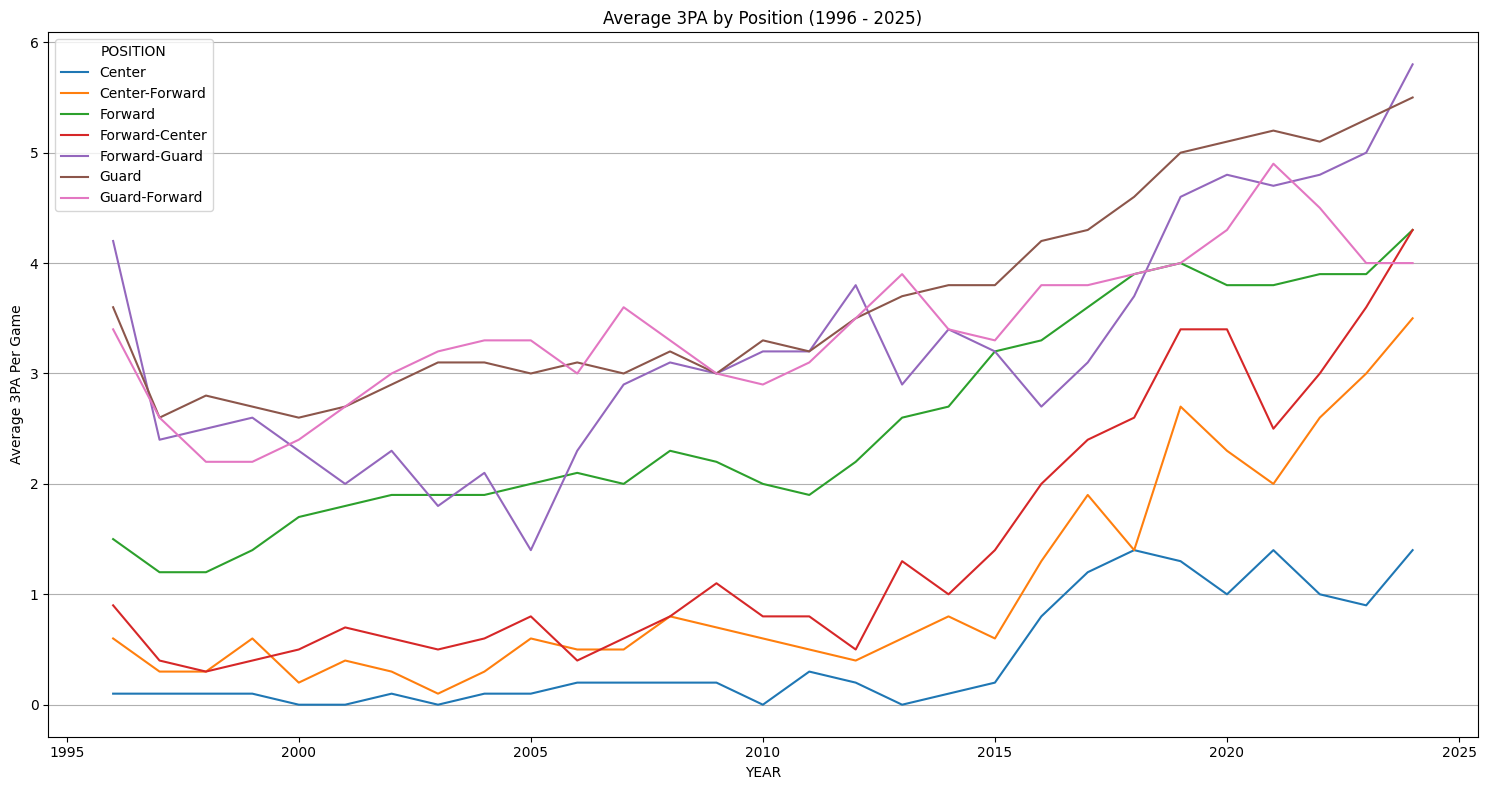

In [15]:
three_by_position_by_year = player.groupby(['YEAR', 'POSITION'])['FG3A'].mean().round(1)
plot_threes = three_by_position_by_year.unstack('POSITION')

plt.figure(figsize = (15, 8))
plot_threes.plot(kind = 'line', ax = plt.gca())
plt.title('Average 3PA by Position (1996 - 2025)')
plt.ylabel("Average 3PA Per Game")
plt.grid(axis = 'y', linestyle = '-')
plt.tight_layout()
plt.savefig('avg_3pa_per_position_by_season.png')

All positions saw a significant jump in 3PA over time. One very significant finding here, in my opinion, is that the Forward-Center position makes a very large jump, ending up above 4 average 3PA per game. Looking at the Guard-Forward (SG/SF) position, it comfortably has the third-highest 3PA at the beginning of the dataset. When we reach the present-day, however, it is surpassed by the Forward and Forward-Center positions, both positions that started off averaging 2+ less 3PA/game than the Guard-Forward position. 

Looking at positional rebounding statistics

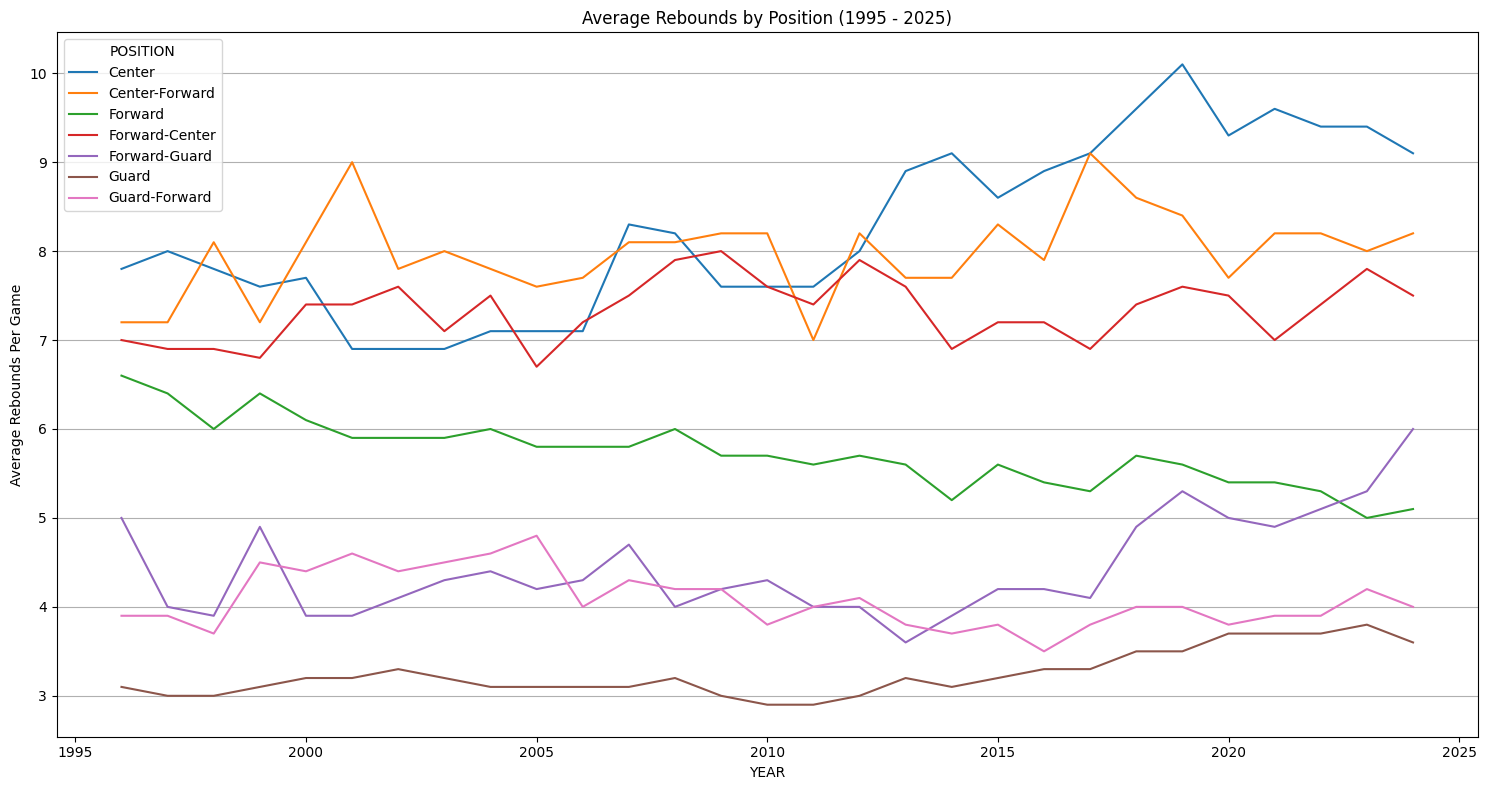

In [ ]:
reb_by_position_by_year = player.groupby(['YEAR','POSITION'])['REB'].mean().round(1)
plot_reb = reb_by_position_by_year.unstack('POSITION')

plt.figure(figsize=(15, 8))
plot_reb.plot(kind = 'line', ax = plt.gca())
plt.title('Average Rebounds by Position (1996 - 2025)')
plt.ylabel('Average Rebounds Per Game')
plt.grid(axis = 'y', linestyle = '-')
plt.tight_layout()
plt.savefig('avg_rebounds_per_position_by_season.png')